In [1]:
import numpy as np
import networkx as nx
import os
from random import shuffle          # importamos las librerias necesarias
import matplotlib.pylab as plt       
%matplotlib inline
from matplotlib.pyplot import title,xlabel,ylabel,show

In [2]:
G = nx.read_gml('dolphins.gml') # definimos la red:cada nodo es un delfin y cada conexion representa una interaccion

In [3]:
def ldata(archive):
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data

dolphinsGender=ldata('dolphinsGender.txt') # usamos la funcion "ldata" para abrir el archivo .txt 

In [4]:
dict_gender = {dolphin_nombre : genero for dolphin_nombre, genero  in dolphinsGender}
for n in G.nodes:
    G.nodes[n]["gender"] = dict_gender[n] 

# PARTICION EN CLUSTERS

In [5]:
import igraph as igraph
import networkx as nx
import community
import time

In [6]:
def calculate_info_fast(np_adj_list, method):
    g = igraph.Graph.Weighted_Adjacency(np_adj_list.tolist(),mode=igraph.ADJ_UPPER)
   
    t0=time.time()
    if method=="infomap":
        labels = g.community_infomap(edge_weights="weight").membership

    if method=="fastgreedy":
        labels = g.community_fastgreedy(weights="weight").as_clustering().membership
                     
    return labels

In [7]:
def AssingCommunities(G,comunidades,name_coms): #comunidades=lista de diccionarios de comunidades
    for name in name_coms:
        for n in G.nodes():
            G.nodes[n][name]=comunidades[0][n]

In [8]:
def Communities(G,labels,name_coms): #laabels=lista de labels de comunidades
    Communities=[]
    for k in range(len(labels)):
        nodos_por_comunidad=[]
        for i in range(len(set(labels[k]))):
            nodos=[]
            for nodo in G.nodes():
                if i==nx.get_node_attributes(G,name_coms[k])[nodo]:
                    nodos.append(nodo)
            nodos_por_comunidad.append(nodos)
        Communities.append(nodos_por_comunidad)
    return(Communities)

COMUNIDADES CON TODOS LOS CRITERIOS

In [9]:
def all_communities(G):
    
    A=nx.to_numpy_matrix(G)
    
    labels_infomap=calculate_info_fast(A,method='infomap')
    dict_comun_infomap=dict(zip(list(G.nodes()),labels_infomap))

    labels_fastg=calculate_info_fast(A,method='fastgreedy')
    dict_comun_fastg=dict(zip(list(G.nodes()),labels_fastg))

    dict_comun_louvain = community.best_partition(G)
    labels_louvain=list(dict_comun_louvain.values())
    
    comunidades=[dict_comun_infomap, dict_comun_fastg, dict_comun_louvain] #adentro de la lista v an todos los diccionarios
    
    global name_coms
    name_coms=['comunidad_infomap','comunidad_fastg','comunidad_louvain'] #,'comunidad_betw']
    
    AssingCommunities(G,comunidades,name_coms)
    
    labels=[labels_infomap,labels_fastg,labels_louvain] #,labels_betw]
    
    #all_coms=Communities(G,labels,name_coms) #esto va adentro de modularity...lista de listas jaja
    
    return labels#all_coms

In [10]:
listadelistas=all_communities(G)

PLOT

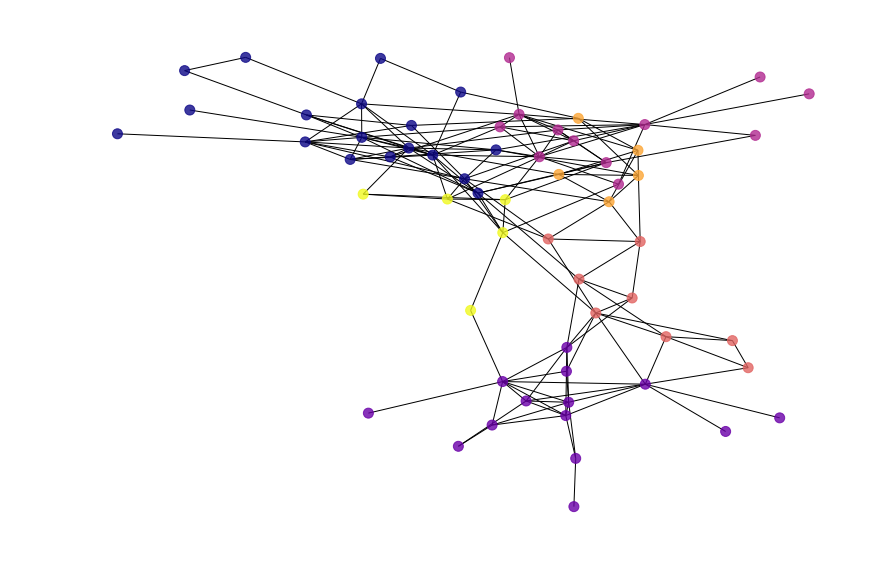

In [11]:
plt.figure(figsize=(15,10))
pos = nx.spring_layout(G) 
        
nx.draw_networkx_nodes(G,pos,
                       cmap=plt.get_cmap('plasma'),
                       node_color=list(dict(nx.get_node_attributes(G,name_coms[1])).values()),
                       node_size=100,
                       alpha=0.8)

#width = 1+10*np.array(list(networkx.get_edge_attributes(g,'weight').values())).ravel()
#edge_color = np.random.uniform(size=len(width))

nx.draw_networkx_edges(G,pos)#"grey")
#plt.title("A bizarre graph")
plt.axis("off")
plt.show()

MODULARITY

In [12]:
from __future__ import division

from functools import wraps
from itertools import product

import networkx as nx
from networkx import NetworkXError
from networkx.utils import not_implemented_for
from networkx.algorithms.community.community_utils import is_partition

__all__ = ['coverage', 'modularity', 'performance']

class NotAPartition(NetworkXError):
    """Raised if a given collection is not a partition.

    """

    def __init__(self, G, collection):
        msg = '{} is not a valid partition of the graph {}'
        msg = msg.format(G, collection)
        super(NotAPartition, self).__init__(msg)


def modularity(G, communities, weight='weight'):
    
    if not is_partition(G, communities):
        raise NotAPartition(G, communities)

    multigraph = G.is_multigraph()
    directed = G.is_directed()
    m = G.size(weight=weight)
    if directed:
        out_degree = dict(G.out_degree(weight=weight))
        in_degree = dict(G.in_degree(weight=weight))
        norm = 1 / m
    else:
        out_degree = dict(G.degree(weight=weight))
        in_degree = out_degree
        norm = 1 / (2 * m)

    def val(u, v):
        try:
            if multigraph:
                w = sum(d.get(weight, 1) for k, d in G[u][v].items())
            else:
                w = G[u][v].get(weight, 1)
        except KeyError:
            w = 0
        # Double count self-loops if the graph is undirected.
        if u == v and not directed:
            w *= 2
        return w - in_degree[u] * out_degree[v] * norm

    Q = sum(val(u, v) for c in communities for u, v in product(c, repeat=2))
    return Q * norm

FUNCION FINAL :O

In [13]:
# DistributionModularity = []                          # Vector para guardar las modularidades de cada iteracion
 
# it = 2                                           # numero de iteraciones 
# swaps = 70
# Grafo = G.copy()                      

# for i in range(it):
#     #Generar grafo recableado
#     list_degrees=list(dict(Grafo.degree).values())
#     GR=nx.configuration_model(list_degrees,create_using=nx.Graph)
#     #Calcular los clusters usando TODOS los criterios
#     lista_listas=all_communities(GR)
#     #Calcular Mod y no se que ... 
#     for i in range(len(lista_listas))
#     modularity(GR,)

In [14]:
lista_listas=all_communities(G)

In [15]:
lista_listas[1]

[['Beescratch',
  'DN16',
  'DN21',
  'DN63',
  'Feather',
  'Gallatin',
  'Jet',
  'Knit',
  'MN23',
  'Mus',
  'Notch',
  'Number1',
  'Quasi',
  'Ripplefluke',
  'SN90',
  'TR82',
  'Upbang',
  'Wave',
  'Web',
  'Zig'],
 ['Fork',
  'Grin',
  'Hook',
  'Kringel',
  'Scabs',
  'Shmuddel',
  'SN4',
  'SN63',
  'SN9',
  'Stripes',
  'Thumper',
  'TR120',
  'TR88',
  'TR99',
  'TSN103',
  'TSN83',
  'Whitetip',
  'Zipfel'],
 ['Cross',
  'Five',
  'Haecksel',
  'Jonah',
  'MN105',
  'MN60',
  'MN83',
  'Patchback',
  'SMN5',
  'Topless',
  'Trigger',
  'Vau'],
 ['Beak', 'Bumper', 'Fish', 'Oscar', 'PL', 'SN96', 'TR77']]

In [16]:
len(lista_listas[1][1])+len(lista_listas[1][0])+len(lista_listas[1][2])+len(lista_listas[1][3])

57

In [17]:
len(G.nodes())

62

In [18]:
modularity(G,lista_listas[0])

0.5277283335311076

In [19]:
modularity(G,lista_listas[1])

NotAPartition:  is not a valid partition of the graph [['Beescratch', 'DN16', 'DN21', 'DN63', 'Feather', 'Gallatin', 'Jet', 'Knit', 'MN23', 'Mus', 'Notch', 'Number1', 'Quasi', 'Ripplefluke', 'SN90', 'TR82', 'Upbang', 'Wave', 'Web', 'Zig'], ['Fork', 'Grin', 'Hook', 'Kringel', 'Scabs', 'Shmuddel', 'SN4', 'SN63', 'SN9', 'Stripes', 'Thumper', 'TR120', 'TR88', 'TR99', 'TSN103', 'TSN83', 'Whitetip', 'Zipfel'], ['Cross', 'Five', 'Haecksel', 'Jonah', 'MN105', 'MN60', 'MN83', 'Patchback', 'SMN5', 'Topless', 'Trigger', 'Vau'], ['Beak', 'Bumper', 'Fish', 'Oscar', 'PL', 'SN96', 'TR77']]

In [20]:
lista_listas[1]

[['Beescratch',
  'DN16',
  'DN21',
  'DN63',
  'Feather',
  'Gallatin',
  'Jet',
  'Knit',
  'MN23',
  'Mus',
  'Notch',
  'Number1',
  'Quasi',
  'Ripplefluke',
  'SN90',
  'TR82',
  'Upbang',
  'Wave',
  'Web',
  'Zig'],
 ['Fork',
  'Grin',
  'Hook',
  'Kringel',
  'Scabs',
  'Shmuddel',
  'SN4',
  'SN63',
  'SN9',
  'Stripes',
  'Thumper',
  'TR120',
  'TR88',
  'TR99',
  'TSN103',
  'TSN83',
  'Whitetip',
  'Zipfel'],
 ['Cross',
  'Five',
  'Haecksel',
  'Jonah',
  'MN105',
  'MN60',
  'MN83',
  'Patchback',
  'SMN5',
  'Topless',
  'Trigger',
  'Vau'],
 ['Beak', 'Bumper', 'Fish', 'Oscar', 'PL', 'SN96', 'TR77']]

In [ ]:
modularity(G,lista_listas[2])

In [23]:
all_labels=all_communities(G)

In [33]:
comunidad_infomap=Communities(G,[all_labels[0]],[name_coms[0]])
comunidad_fast=Communities(G,[all_labels[1]],[name_coms[1]])

In [34]:
comunidad_fast

[[['Beescratch',
   'DN16',
   'DN21',
   'DN63',
   'Feather',
   'Gallatin',
   'Jet',
   'Knit',
   'MN23',
   'Mus',
   'Notch',
   'Number1',
   'Quasi',
   'Ripplefluke',
   'SN90',
   'TR82',
   'Upbang',
   'Wave',
   'Web',
   'Zig'],
  ['Fork',
   'Grin',
   'Hook',
   'Kringel',
   'Scabs',
   'Shmuddel',
   'SN4',
   'SN63',
   'SN9',
   'Stripes',
   'Thumper',
   'TR120',
   'TR88',
   'TR99',
   'TSN103',
   'TSN83',
   'Whitetip',
   'Zipfel'],
  ['Cross',
   'Five',
   'Haecksel',
   'Jonah',
   'MN105',
   'MN60',
   'MN83',
   'Patchback',
   'SMN5',
   'Topless',
   'Trigger',
   'Vau'],
  ['Beak', 'Bumper', 'Fish', 'Oscar', 'PL', 'SN96', 'TR77']]]

In [35]:
modularity(G,comunidad_fast[0])

NotAPartition:  is not a valid partition of the graph [['Beescratch', 'DN16', 'DN21', 'DN63', 'Feather', 'Gallatin', 'Jet', 'Knit', 'MN23', 'Mus', 'Notch', 'Number1', 'Quasi', 'Ripplefluke', 'SN90', 'TR82', 'Upbang', 'Wave', 'Web', 'Zig'], ['Fork', 'Grin', 'Hook', 'Kringel', 'Scabs', 'Shmuddel', 'SN4', 'SN63', 'SN9', 'Stripes', 'Thumper', 'TR120', 'TR88', 'TR99', 'TSN103', 'TSN83', 'Whitetip', 'Zipfel'], ['Cross', 'Five', 'Haecksel', 'Jonah', 'MN105', 'MN60', 'MN83', 'Patchback', 'SMN5', 'Topless', 'Trigger', 'Vau'], ['Beak', 'Bumper', 'Fish', 'Oscar', 'PL', 'SN96', 'TR77']]